# Predicting the Income Level based on Various Factors: US Census Data

##### Problem Statement: The final goal is to build a model, which can predict whether the income of a random adult American citizen is less or greater than 50000$ a year

In [104]:
# importing required librabries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objs as go
from plotly.offline import iplot

### Reading the Data 

In [106]:
df = pd.read_csv("adult.csv")
df.head()

39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3            Cuba   <=50K  
4   United-States   <=50K

In [107]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [109]:
df.drop([' 2174', ' 0', ' 40'], axis = 'columns', inplace = True)
df.head()

39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   United-States   <=50K  
0     Exec-managerial         Husband   White     Male   United-States   <=50K  
1   Handlers-cleaners   Not-in-family   White     Male   United-States   <=50K  
2   Handlers-cleaners         Husband   Black     Male   United-States   <=50K  
3      Prof-specialty            Wife   Black   Female            Cuba   <=50K  
4     Exec-managerial            Wife   White   Female   United-States   <=50K

In [110]:
df.columns = ['Age', 'Type_of_Owner', 'id', 'Education', 'No_of_Projects_Done', 'Marital_Status', 'Job_Designation', 'Family_Relation', 'Race', 'Gender', 'Country', 'Salary']

In [111]:
df.head()

Age      Type_of_Owner      id   Education  No_of_Projects_Done  \
0   50   Self-emp-not-inc   83311   Bachelors                   13   
1   38            Private  215646     HS-grad                    9   
2   53            Private  234721        11th                    7   
3   28            Private  338409   Bachelors                   13   
4   37            Private  284582     Masters                   14   

        Marital_Status     Job_Designation Family_Relation    Race   Gender  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

          Country  Salary  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3            Cuba   <=50K  
4   United-States   <=50K

In [112]:
df.shape

(32560, 12)

There is 32560 rows and 12 columns in the dataset


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  32560 non-null  int64 
 1   Type_of_Owner        32560 non-null  object
 2   id                   32560 non-null  int64 
 3   Education            32560 non-null  object
 4   No_of_Projects_Done  32560 non-null  int64 
 5   Marital_Status       32560 non-null  object
 6   Job_Designation      32560 non-null  object
 7   Family_Relation      32560 non-null  object
 8   Race                 32560 non-null  object
 9   Gender               32560 non-null  object
 10  Country              32560 non-null  object
 11  Salary               32560 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [115]:
df.describe()

Age            id  No_of_Projects_Done
count  32560.000000  3.256000e+04         32560.000000
mean      38.581634  1.897818e+05            10.080590
std       13.640642  1.055498e+05             2.572709
min       17.000000  1.228500e+04             1.000000
25%       28.000000  1.178315e+05             9.000000
50%       37.000000  1.783630e+05            10.000000
75%       48.000000  2.370545e+05            12.000000
max       90.000000  1.484705e+06            16.000000

Average age is 38 with minimum of 17 and maximum of 90 age and the averge number of projects done are 10 with minimum projects done are 1 and maximum 16.

In [117]:
df.isnull().sum()

Age                    0
Type_of_Owner          0
id                     0
Education              0
No_of_Projects_Done    0
Marital_Status         0
Job_Designation        0
Family_Relation        0
Race                   0
Gender                 0
Country                0
Salary                 0
dtype: int64

there is no missing values in the dataset

# Data Visualization

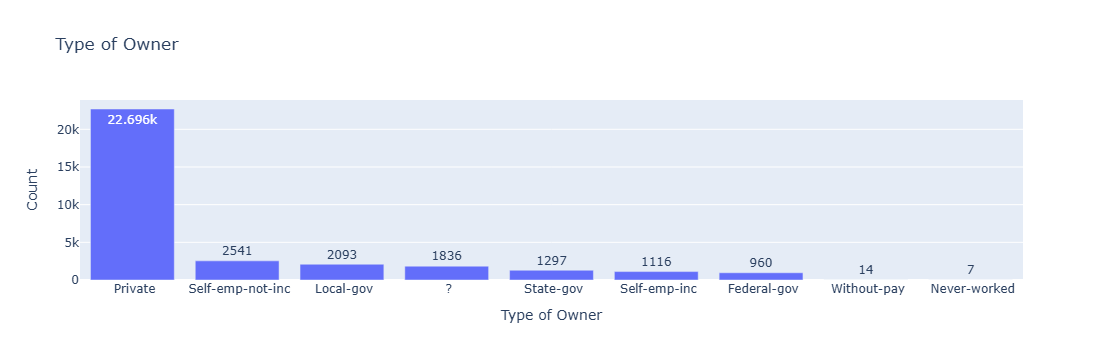

In [120]:
labels = df['Type_of_Owner'].value_counts().index
values = df['Type_of_Owner'].value_counts().values

px.bar(df,x=labels,y=values,text_auto=True,title = "Type of Owner").update_layout(xaxis_title = 'Type of Owner', yaxis_title = 'Count')

The most of the Jobs lies in the private sector 

In [122]:
import plotly.figure_factory as ff

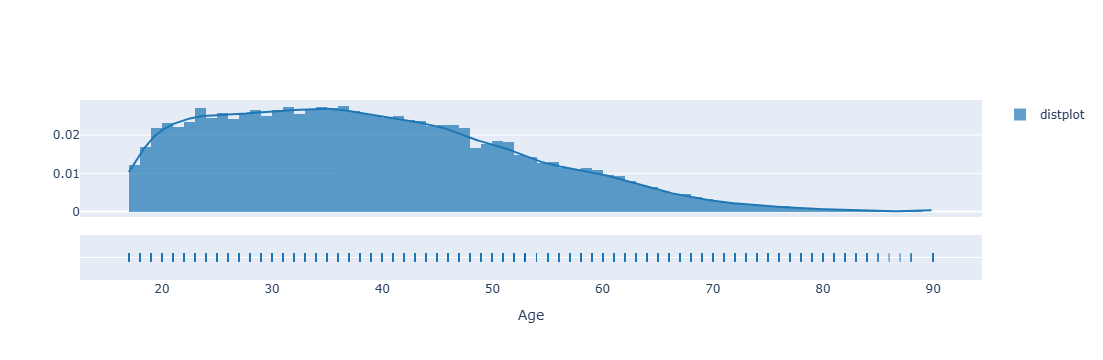

In [123]:
# Visualizing the Type of Age Dataset

labels = df['Age'].value_counts()[:10].index
values = df['Age'].value_counts()[:10].values

ff.create_distplot([df['Age']],['distplot']).update_layout(xaxis_title = 'Age')

The distribution of age is positively skewed and  most of the job-seeker falls in the age-group of 30-40 

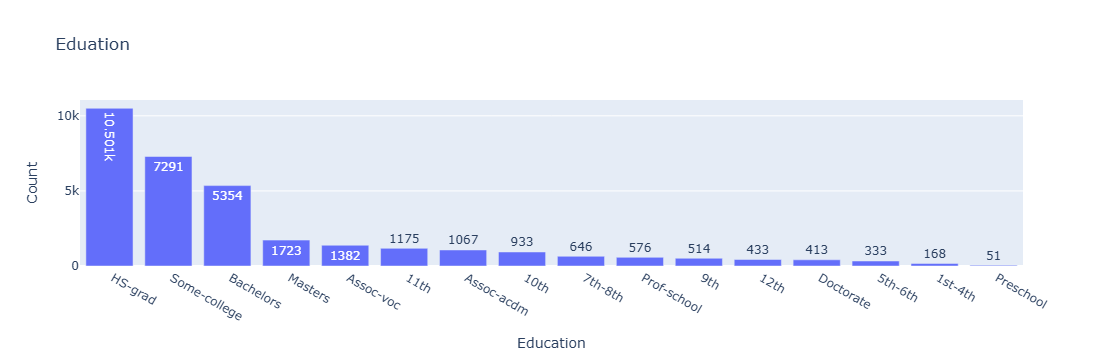

In [125]:
# Visualizing the Highest Degree of Eduaction

labels = df['Education'].value_counts().index
values = df['Education'].value_counts().values

fig = px.bar(df,x=labels,y=values,text_auto=True,title = "Eduation").update_layout(xaxis_title = 'Education', yaxis_title = 'Count')

fig.show()

Most of the Working Class people have HS-grad degree followed by Some-College degree and Bachelors

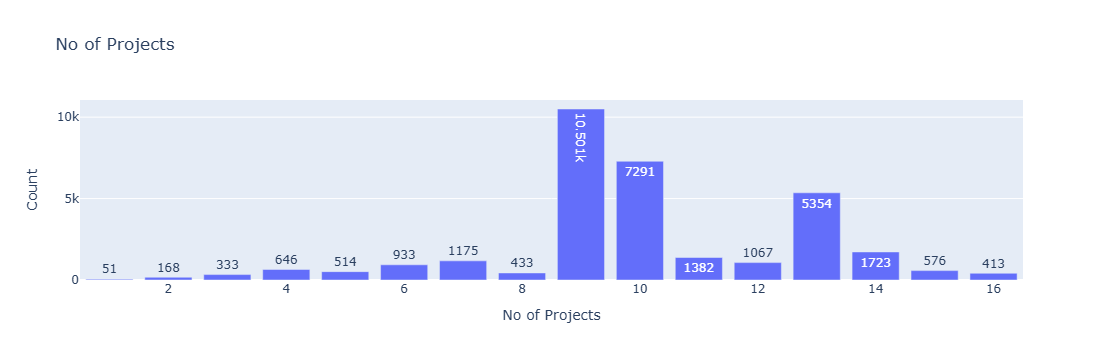

In [127]:
# Visualizing the No_of_Projects_Done

labels = df['No_of_Projects_Done'].value_counts().index
values = df['No_of_Projects_Done'].value_counts().values

fig = px.bar(df,x=labels,y=values,text_auto=True,title = "No of Projects").update_layout(xaxis_title = 'No of Projects', yaxis_title = 'Count')

fig.show()

Most of the People have 9 or 10 projects in their account

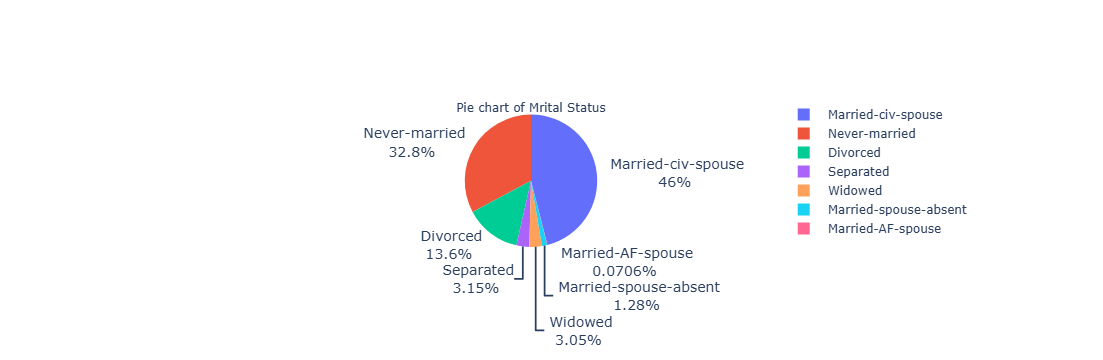

In [129]:
# Visualizing the Marital Status of the Working Class People

labels = df['Marital_Status'].value_counts().index
values = df['Marital_Status'].value_counts().values

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent", title = 'Pie chart of Mrital Status')])
fig.update_traces(textfont_size=14)
fig.show()



From the Pie chart 46% people are married and 32.8% people never get married

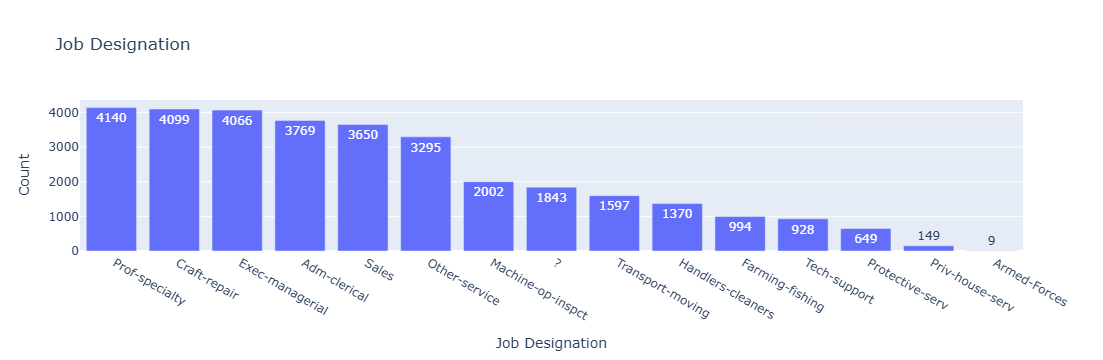

In [131]:
# Visualizing the Job Descriptions of the Working Class People

labels = df['Job_Designation'].value_counts().index
values = df['Job_Designation'].value_counts().values

fig = px.bar(df,x=labels,y=values,text_auto=True,title = "Job Designation").update_layout(xaxis_title = 'Job Designation', yaxis_title = 'Count')

fig.show()

Most of the people are involved in Prof-speciality, Craft-repair, Exec-managerial and Adm-clerical

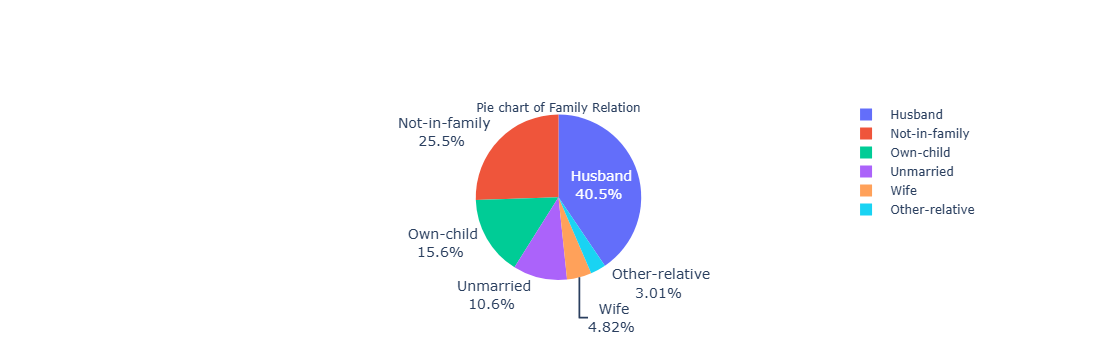

In [133]:
# Visualizing the Family-Relation of the Working Class People

labels = df['Family_Relation'].value_counts().index
values = df['Family_Relation'].value_counts().values

colors = df['Family_Relation']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",title = 'Pie chart of Family Relation',
                               marker = dict(colors=colors))])
fig.update_traces(textfont_size=14)

fig.show()

Most of the working class person are Husband of someone


In [135]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

There are 4 different race of the Working Class of the people

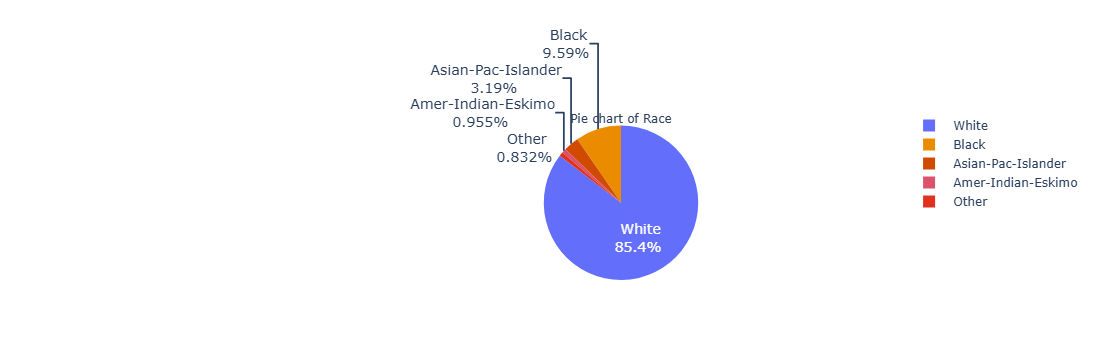

In [137]:
# Visualizing the Race of the Working Class People

labels = df['Race'].value_counts().index
values = df['Race'].value_counts().values

colors = ['#ffb6000',
 '#eb8c00',
 '#d04a02',
 '#db536a','#e0301e']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",title = 'Pie chart of Race',
                               marker = dict(colors=colors))])
fig.update_traces(textfont_size=14)
fig.show()

From the pie chart White people have more jobs as compared to black people

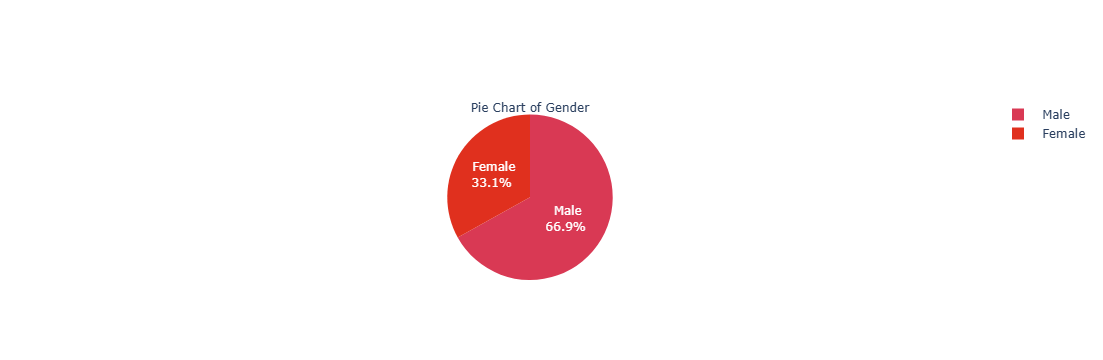

In [139]:
# Visualizing the Gender of the Working Class People

labels = df['Gender'].value_counts().index
values = df['Gender'].value_counts().values

colors = ['#d93954','#e0301e']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",title = 'Pie Chart of Gender',
                               marker = dict(colors=colors))])

fig.show()

Female are less as compared to male to get a job.

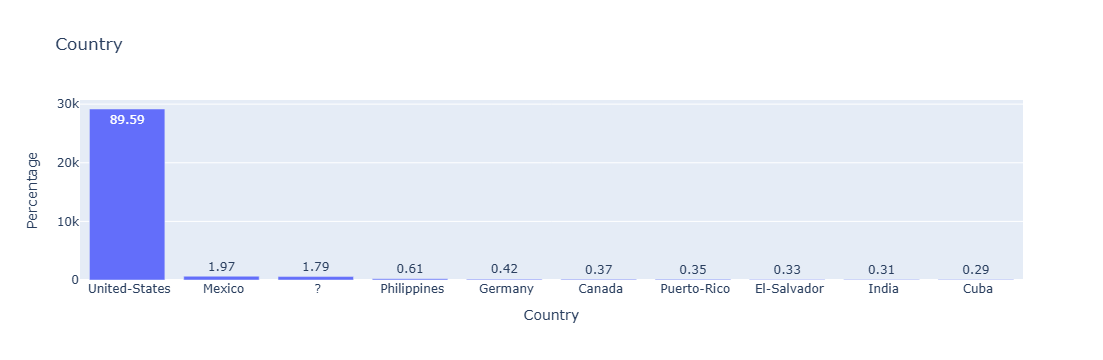

In [141]:
# Visualizing the Country of the Working Class People

labels = df['Country'].value_counts().head(10).index
values = df['Country'].value_counts().head(10).values
country=df['Country'].value_counts()
country['per']=df['Country'].value_counts().apply(lambda x:x/df['Country'].value_counts().sum()*100)
fig = px.bar(df,x=labels,y=values,text = round(country['per'],2).head(10).values,title = "Country").update_layout(xaxis_title = 'Country', yaxis_title = 'Percentage')

fig.show()

About 90% of the Working Class people are Residents of the US

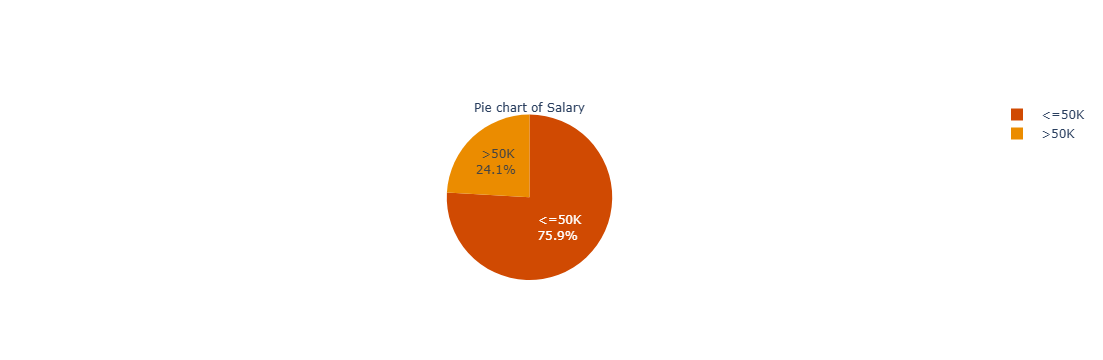

In [143]:
# Visualizing the Salary of the Working Class People

labels = df['Salary'].value_counts().index
values = df['Salary'].value_counts().values

colors = ['#d04a02',
 '#eb8c00']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",title = 'Pie chart of Salary',
                               marker = dict(colors=colors))])

fig.show()

Only round 24% of the people get the salary above 50K and around 76% of the people get 50k or less than 50k as salary

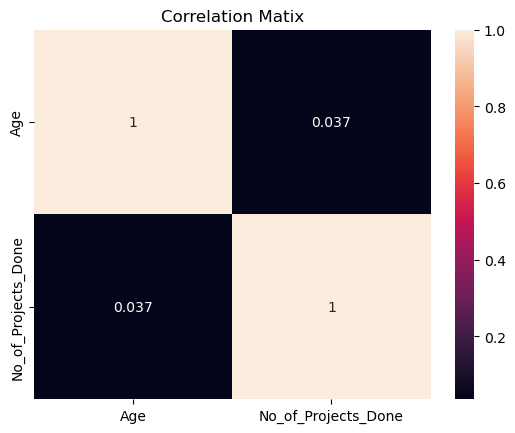

In [145]:
sns.heatmap(df[['Age','No_of_Projects_Done']].corr(),annot=True)
plt.title('Correlation Matix')
plt.show()

from above heatmap of correlation we conclude that age and no of projects done are not related.i.e. there no multicolieanrity

In [147]:
obj = df.select_dtypes('object')
obj

Type_of_Owner    Education       Marital_Status  \
0       Self-emp-not-inc    Bachelors   Married-civ-spouse   
1                Private      HS-grad             Divorced   
2                Private         11th   Married-civ-spouse   
3                Private    Bachelors   Married-civ-spouse   
4                Private      Masters   Married-civ-spouse   
...                  ...          ...                  ...   
32555            Private   Assoc-acdm   Married-civ-spouse   
32556            Private      HS-grad   Married-civ-spouse   
32557            Private      HS-grad              Widowed   
32558            Private      HS-grad        Never-married   
32559       Self-emp-inc      HS-grad   Married-civ-spouse   

          Job_Designation Family_Relation    Race   Gender         Country  \
0         Exec-managerial         Husband   White     Male   United-States   
1       Handlers-cleaners   Not-in-family   White     Male   United-States   
2       Handlers-cleaners         Husband   Black     Male   United-States   
3          Prof-specialty            Wife   Black   Female            Cuba   
4         Exec-managerial            Wife   White   Female   United-States   
...                   ...             ...     ...      ...             ...   
32555        Tech-support            Wife   White   Female   United-States   
32556   Machine-op-inspct         Husband   White     Male   United-States   
32557        Adm-clerical       Unmarried   White   Female   United-States   
32558        Adm-clerical       Own-child   White     Male   United-States   
32559     Exec-managerial            Wife   White   Female   United-States   

       Salary  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 9 columns]

In [148]:
obj.columns

Index(['Type_of_Owner', 'Education', 'Marital_Status', 'Job_Designation',
       'Family_Relation', 'Race', 'Gender', 'Country', 'Salary'],
      dtype='object')

encoding the categorical variables

In [150]:
import category_encoders as ce

In [151]:
encoder = ce.OrdinalEncoder(cols=['Type_of_Owner', 'Education', 'Marital_Status', 'Job_Designation',
       'Family_Relation', 'Race', 'Gender', 'Country', 'Salary'])

new_obj = encoder.fit_transform(obj)
y=new_obj['Salary']
new_obj.drop(['Salary'],axis=1,inplace=True)

In [152]:
from sklearn.feature_selection import chi2

H0: Two variables are independent   
H1: Two variables are not independent

In [154]:
z,p=chi2(new_obj,y);p

array([1.39479238e-24, 1.04438697e-42, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.04689950e-12, 6.74175430e-57, 8.22530597e-66])

In [155]:
pvalue=pd.Series(p,index=new_obj.columns)

pvalue[pvalue>0.05].index

Index([], dtype='object')

pavalue is less than alpha=0.05 H0 is rejected i.e there is dependancy between all independant and dependant variables i.e all features are important.

Now we will check for the linear relationship between x and y

In [158]:
num = df[['Age','No_of_Projects_Done']]

In [159]:
from scipy.stats import pearsonr

pval=[]
for i in num.columns:
    stat,pvalue=pearsonr(num[i],y)
    pval.append(pvalue)

pval=pd.Series(pval,index=num.columns);pval

Age                    0.0
No_of_Projects_Done    0.0
dtype: float64

In [160]:
i=pval[pval>0.05].index

In [161]:
i

Index([], dtype='object')

no value is greater than  0.05 hence all features are important

### Splitting the Data into Train and Test Set

In [164]:
X=pd.concat([num,new_obj],axis=1)

In [165]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [166]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (26048, 10)
The size of training output is (26048,)
The size of testing input is (6512, 10)
The size of testing output is (6512,)


# Feature Engineering

In [168]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [169]:
X_train

array([[-1.35918592, -0.80704475, -0.41174768, ..., -0.35532261,
        -0.70047973, -0.25688482],
       [-1.28597287, -0.02701129,  0.25983676, ..., -0.35532261,
         1.42759305, -0.25688482],
       [ 1.86218837, -0.02701129, -0.41174768, ..., -0.35532261,
         1.42759305, -0.25688482],
       ...,
       [ 0.32471428, -0.41702802, -0.41174768, ..., -0.35532261,
        -0.70047973,  0.72995053],
       [-1.28597287, -0.41702802, -0.41174768, ..., -0.35532261,
         1.42759305, -0.25688482],
       [-0.84669456,  1.1430389 ,  1.60300566, ..., -0.35532261,
         1.42759305, -0.25688482]])

In [170]:
X_test

array([[-0.04135098, -0.41702802, -0.41174768, ..., -0.35532261,
         1.42759305, -0.25688482],
       [ 0.47114038, -0.41702802,  0.25983676, ..., -0.35532261,
         1.42759305, -0.25688482],
       [-0.70026845,  1.1430389 , -0.41174768, ...,  1.22734554,
        -0.70047973, -0.25688482],
       ...,
       [-1.57882507, -1.19706148, -0.41174768, ..., -0.35532261,
        -0.70047973, -0.25688482],
       [-0.55384235, -0.02701129, -0.41174768, ..., -0.35532261,
        -0.70047973, -0.25688482],
       [ 0.61756648,  1.1430389 ,  0.93142121, ...,  1.22734554,
        -0.70047973, -0.25688482]])

In [171]:
y_train.head()

24639    1
5514     1
19777    1
10781    1
32239    1
Name: Salary, dtype: int32

In [172]:
y_test.head()

14160    1
27047    1
28867    2
5667     2
7827     1
Name: Salary, dtype: int32

# Model Building

## Decision Tree Classifier

In [175]:
# Importing DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)

# Fitting/Training the Model
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [176]:
# Predicting Test set results 
y_pred = clf.predict(X_test)

In [177]:
# finding the training and testing accuracy
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ", clf.score(X_test, y_test))

Training Accuracy:  0.8204468673218673
Testing Accuracy:  0.8149570024570024


From the above output we can see that there is no variation in the train set and test accuracy

In [179]:
from sklearn.metrics import confusion_matrix

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4642  270]
 [ 935  665]]


In [180]:
# Printing the scores on training and test set

print('Training set Score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set Score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set Score: 0.8204
Test set Score: 0.8150


## Logistic regression

In [182]:
# Importing the required Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Defining model

model = LogisticRegression()

model.fit(X_train, y_train)

# Predicting the values for x-test
y_pred = model.predict(X_test)

In [183]:
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

Training Accuracy:  0.8197558353808354
Testing Accuracy:  0.8161855036855037


In [184]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4559  353]
 [ 844  756]]


## Random Forest

In [186]:
# Creating a model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predicting the value for X_test
y_pred = model.predict(X_test)

In [187]:
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

Training Accuracy:  0.937845515970516
Testing Accuracy:  0.8029791154791155


In [188]:
# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4336  576]
 [ 707  893]]


## KNeighborsClassifier

In [190]:
from sklearn.neighbors import KNeighborsClassifier

# creating a model
model = KNeighborsClassifier(n_neighbors = 5)

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the values for x-test
y_pred = model.predict(X_test)

In [191]:
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

Training Accuracy:  0.8637515356265356
Testing Accuracy:  0.8092751842751843


In [192]:
# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4337  575]
 [ 667  933]]


The Random Forest model gives more accuracy than other models which is 93% adn 83% for training and testing respectively.  with true positive 4359 and true negative 876.